# Set Up

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import laspy
import open3d as o3d
import pptk

In [6]:
## params

camera_load_path = 'data/camera_intrinsics.npy'
data_load_path = 'data/00000.npz'

In [7]:
data = np.load(data_load_path, allow_pickle=True)

In [8]:
data.files

['lidar_extrinsic',
 'camera_frames',
 'lidar_points',
 'radar_points',
 'timestamp']

In [9]:
camera_intrinsics = np.load(camera_load_path, allow_pickle=True)
camera_intrinsics

array({'20438665': (array([[1.58872913e+03, 0.00000000e+00, 7.86565979e+02],
       [0.00000000e+00, 1.58702332e+03, 5.99634338e+02],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]]), array([-3.53436589e-01,  1.73789188e-01,  4.59876377e-04,  2.28677003e-04,
       -4.24957499e-02])), '21248038': (array([[921.25012207,   0.        , 810.12683105],
       [  0.        , 919.81573486, 609.09924316],
       [  0.        ,   0.        ,   1.        ]]), array([-3.45696598e-01,  1.45627782e-01,  4.16418625e-04,  8.83945104e-05,
       -3.15962918e-02])), '21248039': (array([[921.56262207,   0.        , 798.21435547],
       [  0.        , 920.61071777, 623.21325684],
       [  0.        ,   0.        ,   1.        ]]), array([-0.3506287 ,  0.15762003,  0.00035081,  0.00047343, -0.03870845]))},
      dtype=object)

# Camera

In [10]:
camera = data['camera_frames'].item()

In [11]:
# keys
camera.keys()

dict_keys(['20438665', '21248038', '21248039'])

In [12]:
# shape
camera['20438665'].shape

(1240, 1616, 3)

In [13]:
# example content
camera['20438665']

array([[[207, 162, 138],
        [207, 162, 138],
        [207, 162, 138],
        ...,
        [127,  89,  71],
        [127,  89,  71],
        [127,  89,  71]],

       [[207, 162, 138],
        [207, 162, 138],
        [207, 162, 138],
        ...,
        [127,  89,  71],
        [127,  89,  71],
        [127,  89,  71]],

       [[207, 162, 138],
        [207, 162, 138],
        [207, 162, 138],
        ...,
        [127,  89,  71],
        [127,  89,  71],
        [127,  89,  71]],

       ...,

       [[ 58,  61,  61],
        [ 59,  62,  62],
        [ 59,  62,  62],
        ...,
        [ 41,  41,  41],
        [ 41,  41,  41],
        [ 41,  41,  41]],

       [[ 62,  65,  65],
        [ 62,  65,  65],
        [ 61,  64,  64],
        ...,
        [ 41,  41,  41],
        [ 41,  41,  41],
        [ 43,  43,  43]],

       [[ 62,  65,  65],
        [ 63,  66,  66],
        [ 63,  66,  66],
        ...,
        [ 43,  43,  43],
        [ 43,  43,  43],
        [ 43,  43,  43]]

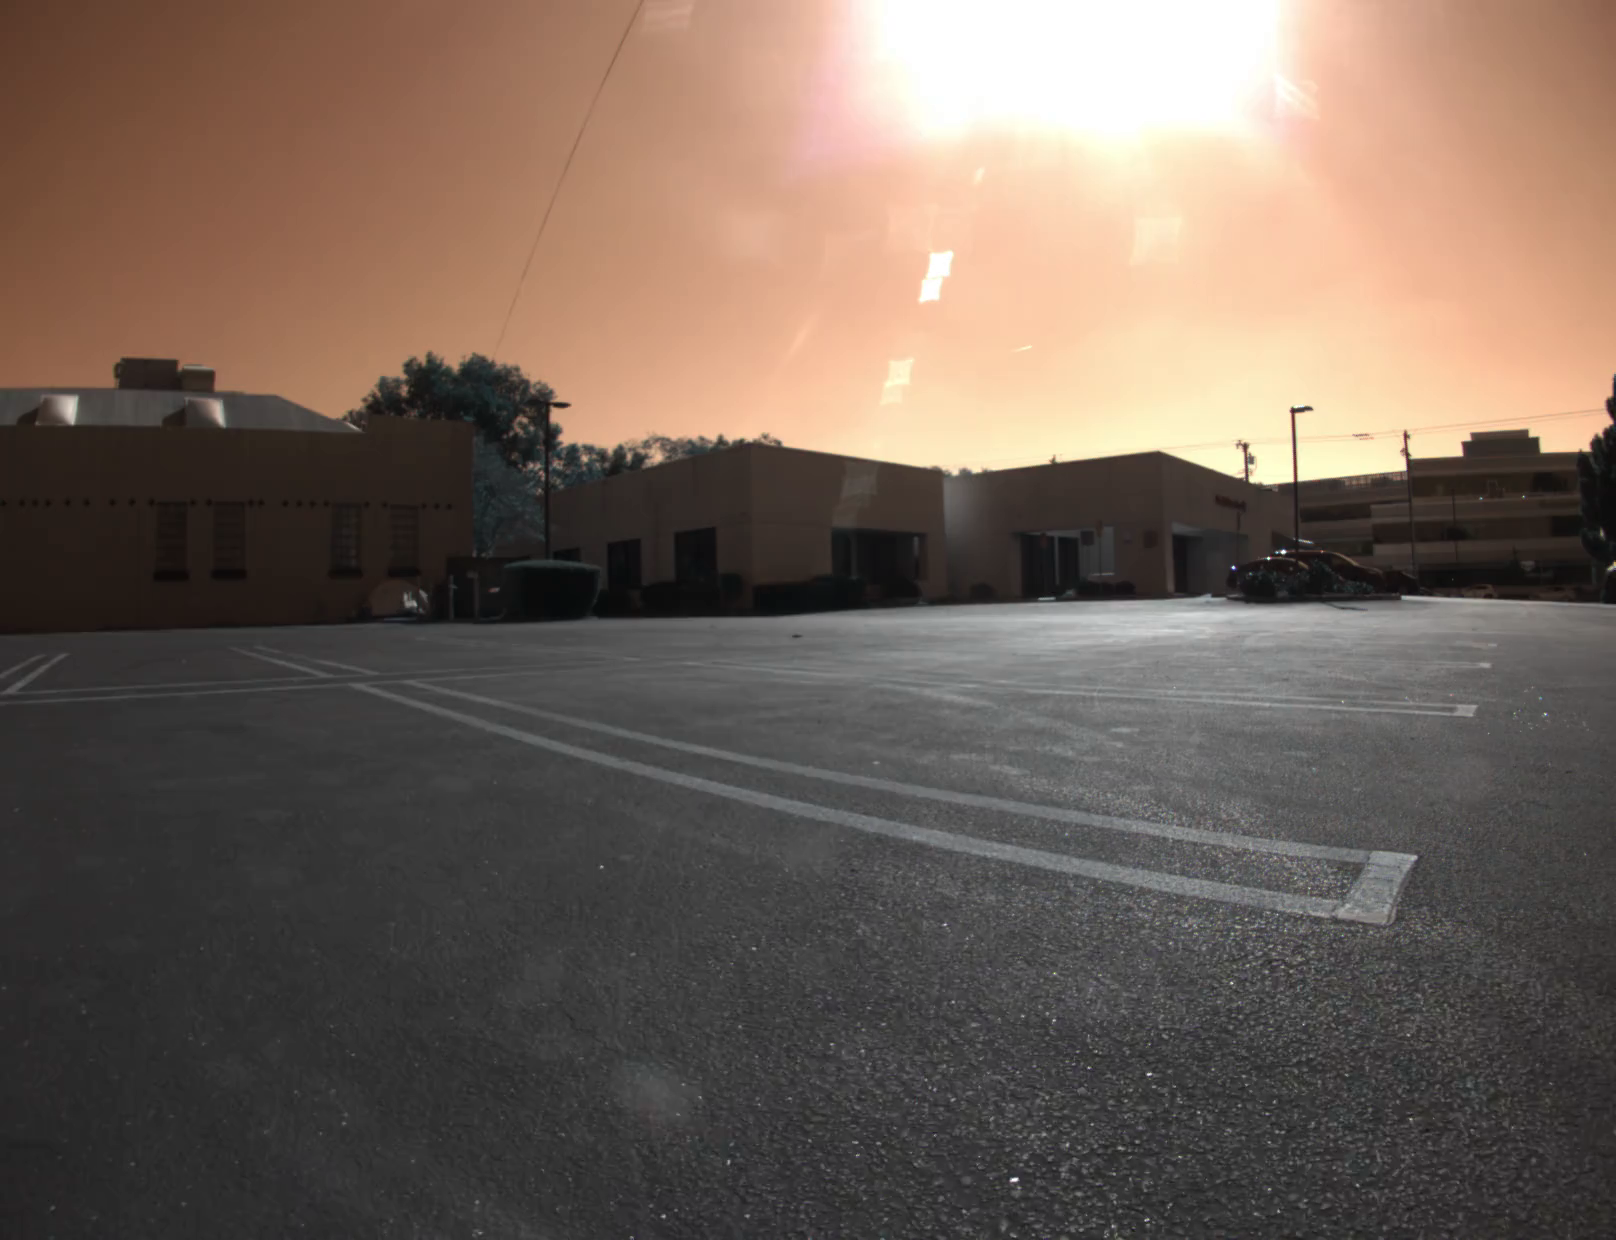

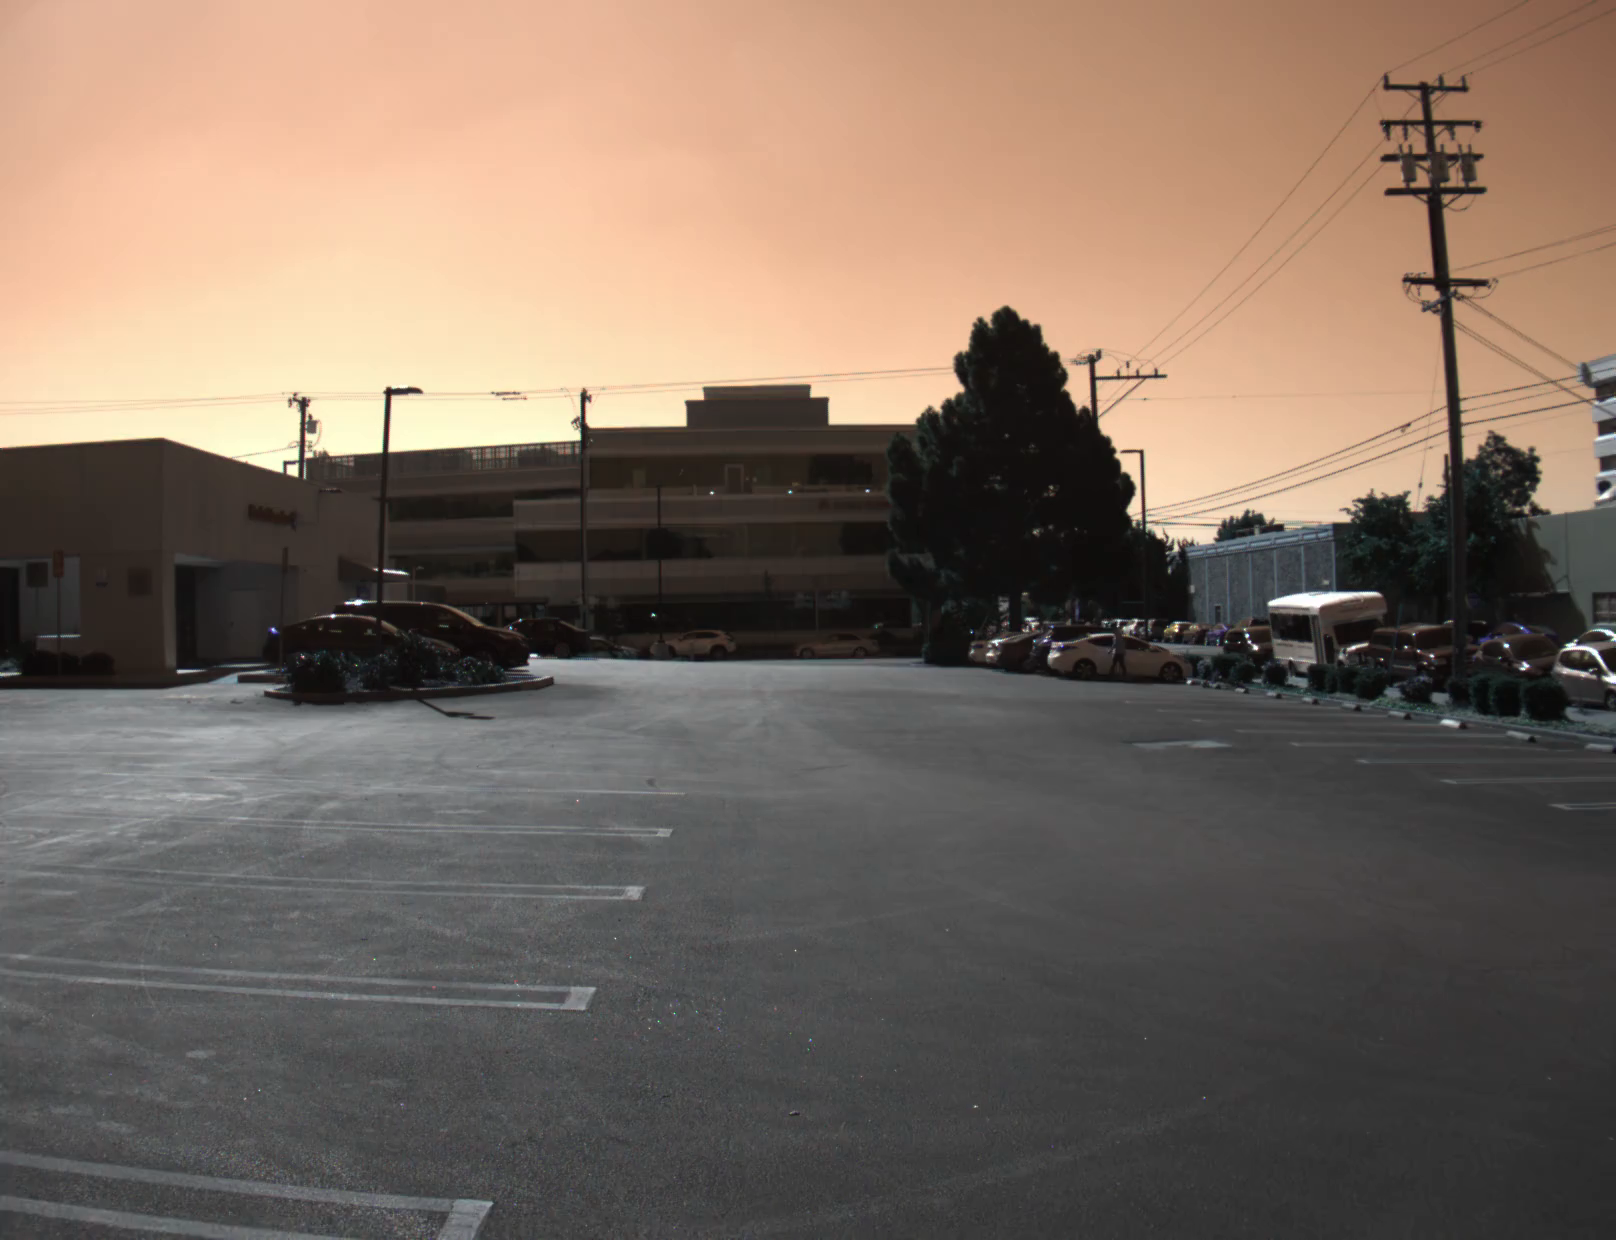

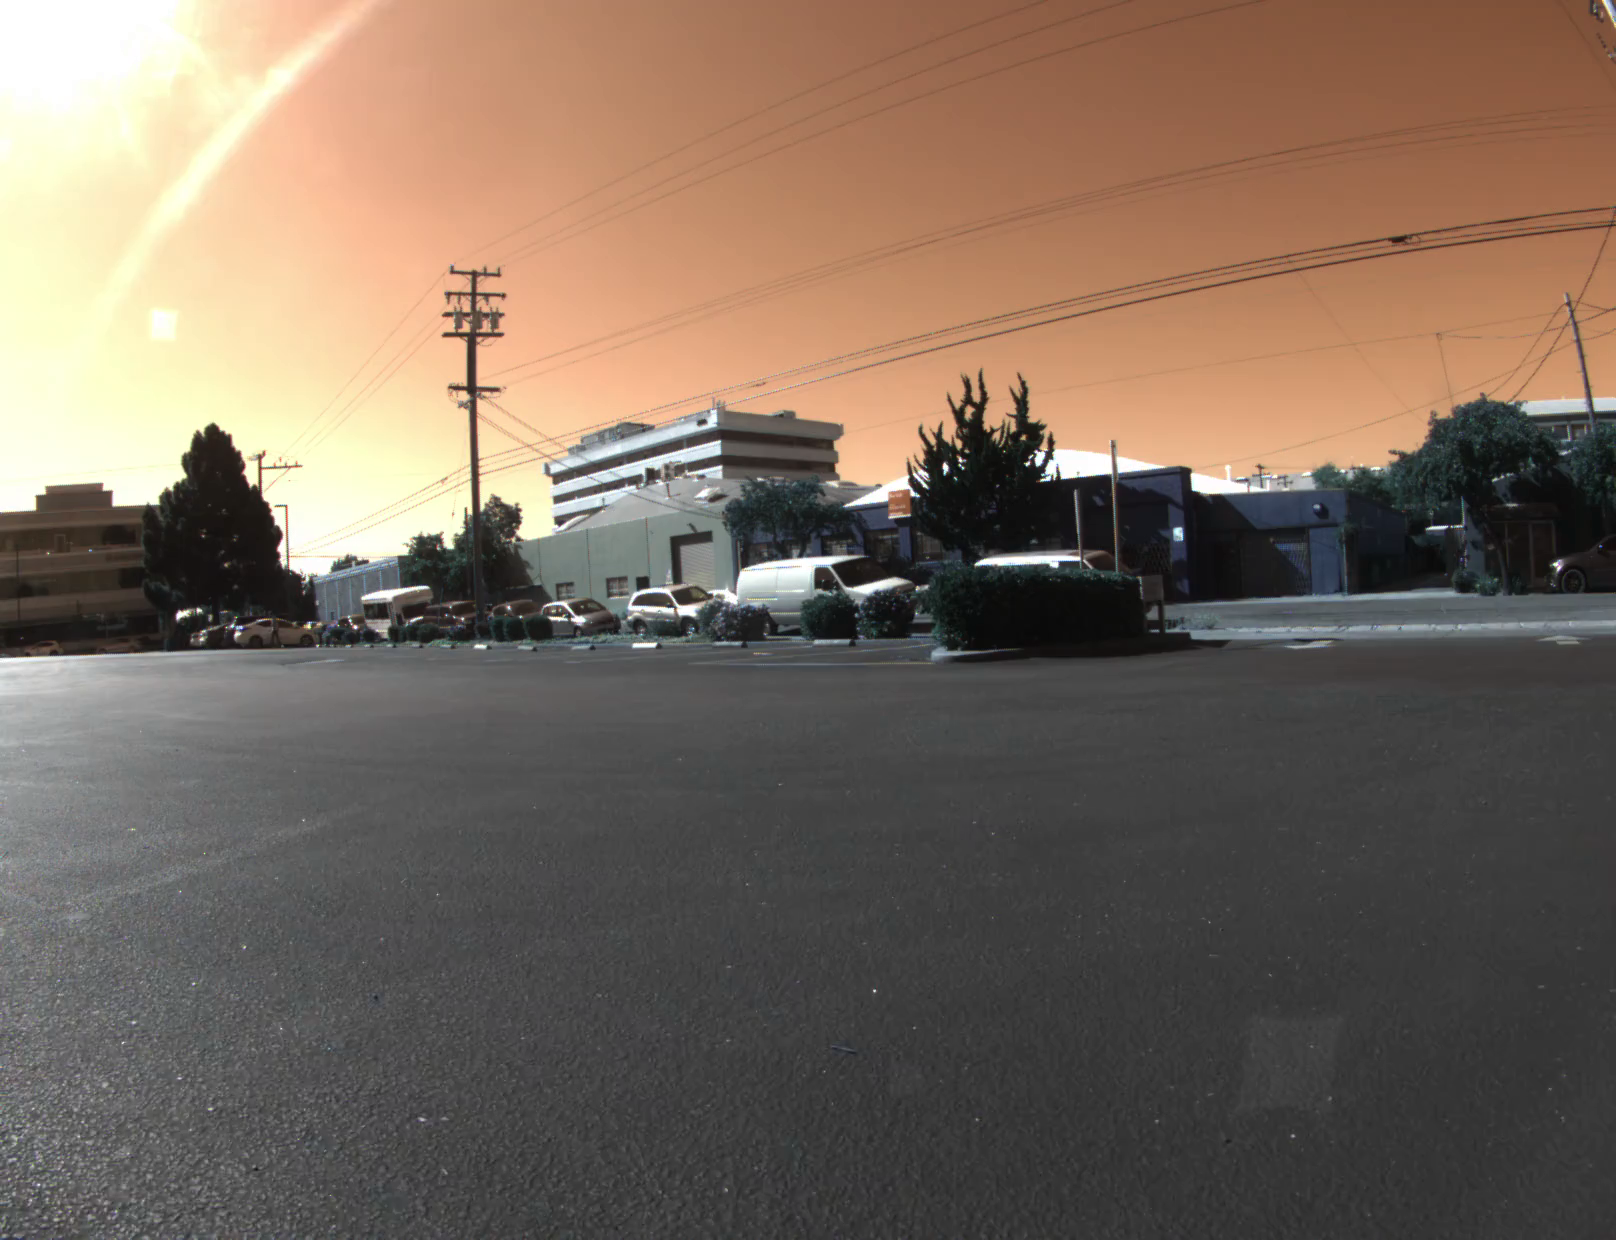

In [14]:
# actual image
display(Image.fromarray(camera['21248038']))
display(Image.fromarray(camera['20438665']))
display(Image.fromarray(camera['21248039']))

# Lidar

## Extrinsic

In [15]:
lidar_ex = data['lidar_extrinsic']
lidar_ex

array([[ 0.02442975, -0.99872376,  0.04420451, -2.3342    ],
       [ 0.9996051 ,  0.0250177 ,  0.01279649, -0.03      ],
       [-0.01388605,  0.04387444,  0.99894054,  1.4       ]])

## Points

In [16]:
lidar_pt = data['lidar_points']

In [17]:
# shape
lidar_pt.shape

(69545, 3)

In [19]:
lidar_pt

array([[-3.22918428e+01, -1.69352086e+01,  1.21533837e+01],
       [-1.86017275e+01, -9.83041016e+00,  7.33045522e+00],
       [-1.85639286e+01, -9.88600285e+00,  7.32847225e+00],
       ...,
       [-4.12119416e+00,  1.46431004e-02,  8.71649125e-01],
       [-4.06766351e+00,  7.63497029e-03,  8.87601788e-01],
       [-4.09465508e+00,  2.15940033e-03,  8.79750468e-01]])

In [20]:
### open3d
# geom = o3d.geometry.PointCloud()
# geom.points = o3d.utility.Vector3dVector(lidar_pt)
# o3d.visualization.draw_geometries([geom])

### pptk
v = pptk.viewer(lidar_pt)

# Radar

In [21]:
radar_pt = data['radar_points'].item()

In [22]:
radar_pt

{'ZRVE1001': array([[  0.28448423,  -0.39485696,   0.39376405],
        [ -0.16695996,  -0.43778064,   0.53086656],
        [ -0.55958707,  -0.38107842,   1.18085111],
        ...,
        [ 28.86555629,  -0.595582  ,  90.71804477],
        [ 28.76230683,  -1.54086603,  90.85146336],
        [-48.52674079,  -0.56173442,  83.85219031]]),
 'ZRVC2001': array([[-8.21349151, -0.6161381 ,  4.9302612 ],
        [-8.31651157, -0.63916214,  4.96388701],
        [-8.33579305, -0.70844868,  4.92102934],
        ...,
        [-2.02223074, -0.28421547, 90.23980174],
        [-1.90636642, -1.5692639 , 90.33550813],
        [ 0.80881361,  1.97677834, 90.34735855]]),
 'ZRVE1002': array([[ -0.20677664,  -0.34057339,   1.65039233],
        [  0.39475492,  -0.37213573,   1.62242464],
        [  0.95255816,  -0.32907628,   1.39956273],
        ...,
        [-68.83628571,   1.07488072,  58.66410207],
        [-68.46137938,   0.9223213 ,  59.26768243],
        [-69.14189845,   1.56498948,  58.45877244]])}

In [23]:
# shape
radar_pt['ZRVC2001'].shape

(630, 3)

In [24]:
radar_all = np.vstack([radar_pt['ZRVC2001'], radar_pt['ZRVE1001'], radar_pt['ZRVE1002']])

In [25]:
# geom = o3d.geometry.PointCloud()
# geom.points = o3d.utility.Vector3dVector(radar_pt['ZRVC2001'])
# o3d.visualization.draw_geometries([geom])

pptk.viewer(radar_all)

# Timestamp

In [26]:
timestamp = data['timestamp']
timestamp

array(1.34851063e+09)